In [1]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display

In [3]:
im1_file = '../images/cat.jpg'
im2_file = '../images/dog.jpg'

im1_BGR = cv2.imread(im1_file)
im2_BGR = cv2.imread(im2_file)

In [4]:
im1_RGB = cv2.cvtColor(im1_BGR, cv2.COLOR_BGR2RGB)
im2_RGB = cv2.cvtColor(im2_BGR, cv2.COLOR_BGR2RGB)
im1_HSV = cv2.cvtColor(im1_BGR, cv2.COLOR_BGR2HSV)
im2_HSV = cv2.cvtColor(im2_BGR, cv2.COLOR_BGR2HSV)
im1_YCC = cv2.cvtColor(im1_BGR, cv2.COLOR_BGR2YCrCb)
im2_YCC = cv2.cvtColor(im2_BGR, cv2.COLOR_BGR2YCrCb)
im1_HLS = cv2.cvtColor(im1_BGR, cv2.COLOR_BGR2HLS)
im2_HLS = cv2.cvtColor(im2_BGR, cv2.COLOR_BGR2HLS)
im1_LAB = cv2.cvtColor(im1_BGR, cv2.COLOR_BGR2LAB)
im2_LAB = cv2.cvtColor(im2_BGR, cv2.COLOR_BGR2LAB)
im1_XYZ = cv2.cvtColor(im1_BGR, cv2.COLOR_BGR2XYZ)
im2_XYZ = cv2.cvtColor(im2_BGR, cv2.COLOR_BGR2XYZ)

In [5]:
im1_list = [im1_RGB, im1_HSV, im1_YCC, im1_HLS, im1_LAB, im1_XYZ]
im2_list = [im2_RGB, im2_HSV, im2_YCC, im2_HLS, im2_LAB, im2_XYZ]
cvt_RGB = [None, cv2.COLOR_HSV2RGB, cv2.COLOR_YCrCb2RGB, cv2.COLOR_HLS2RGB, cv2.COLOR_LAB2RGB, cv2.COLOR_XYZ2RGB]
cspace_name = ["RGB", "HSV", "YCrCb", "HLS", "LAB", "XYZ"]

<IPython.core.display.Javascript object>


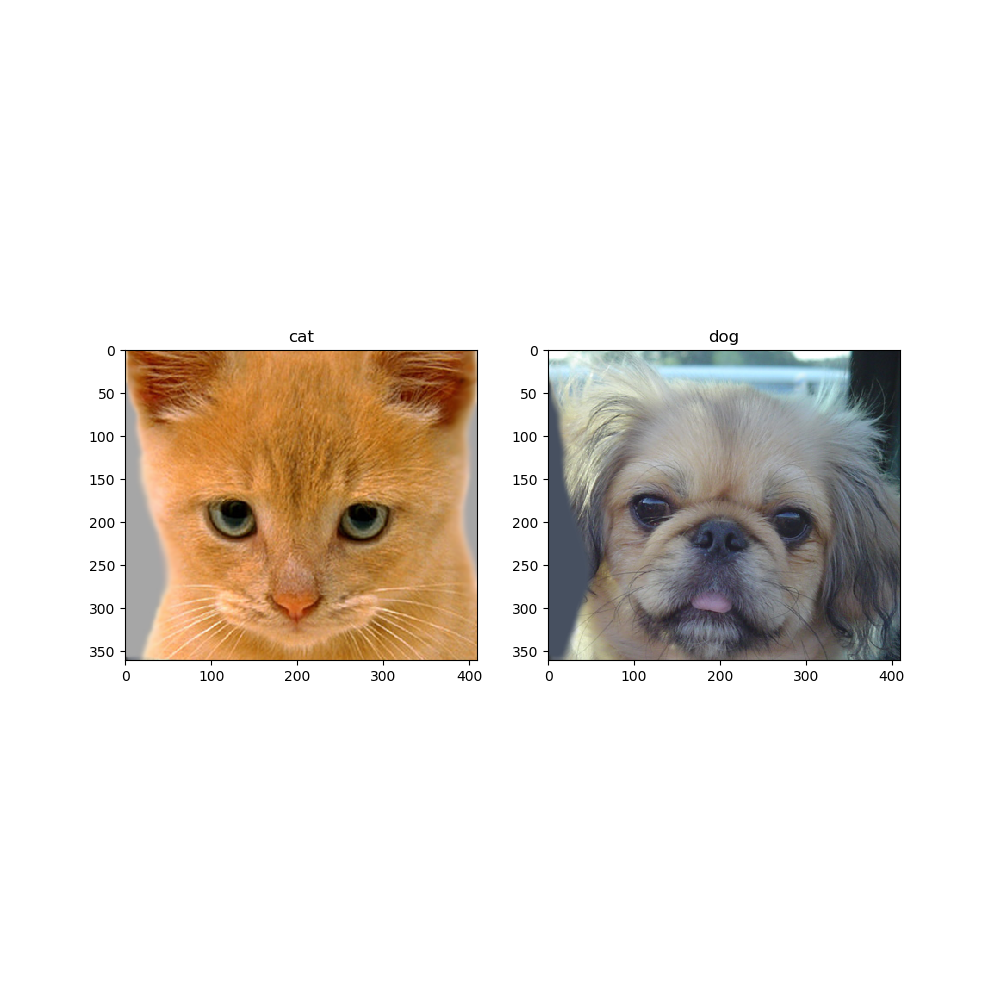

Text(0.5, 1.0, 'dog')

In [6]:
fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(im1_RGB)
plt.title("cat")
fig.add_subplot(rows, columns, 2)
plt.imshow(im2_RGB)
plt.title("dog")

In [97]:
def high_pass(img, dim, idx):
    #img_res = img.copy()
    img_res = np.zeros(shape=img.shape, dtype=np.uint8)
    img_res[:,:,dim] = img[:,:,dim]
    #img_res = cv2.cvtColor(img_res, cvt_RGB[idx]) if cvt_RGB[idx] != None else img_res
    #img_res = cv2.cvtColor(img_res, cv2.COLOR_RGB2GRAY)
    img_res = img_res - cv2.GaussianBlur(img_res,(29,29),cv2.BORDER_DEFAULT)
    return img_res

In [98]:
def low_pass(img, dim, idx):
    #img_res = img.copy()
    img_res = np.zeros(shape=img.shape, dtype=np.uint8)
    img_res[:,:,dim] = img[:,:,dim]
    #img_res = cv2.cvtColor(img_res, cvt_RGB[idx]) if cvt_RGB[idx] != None else img_res
    #img_res = cv2.cvtColor(img_res, cv2.COLOR_RGB2GRAY)
    img_res = cv2.GaussianBlur(img_res,(29,29),cv2.BORDER_DEFAULT)
    return img_res

<IPython.core.display.Javascript object>


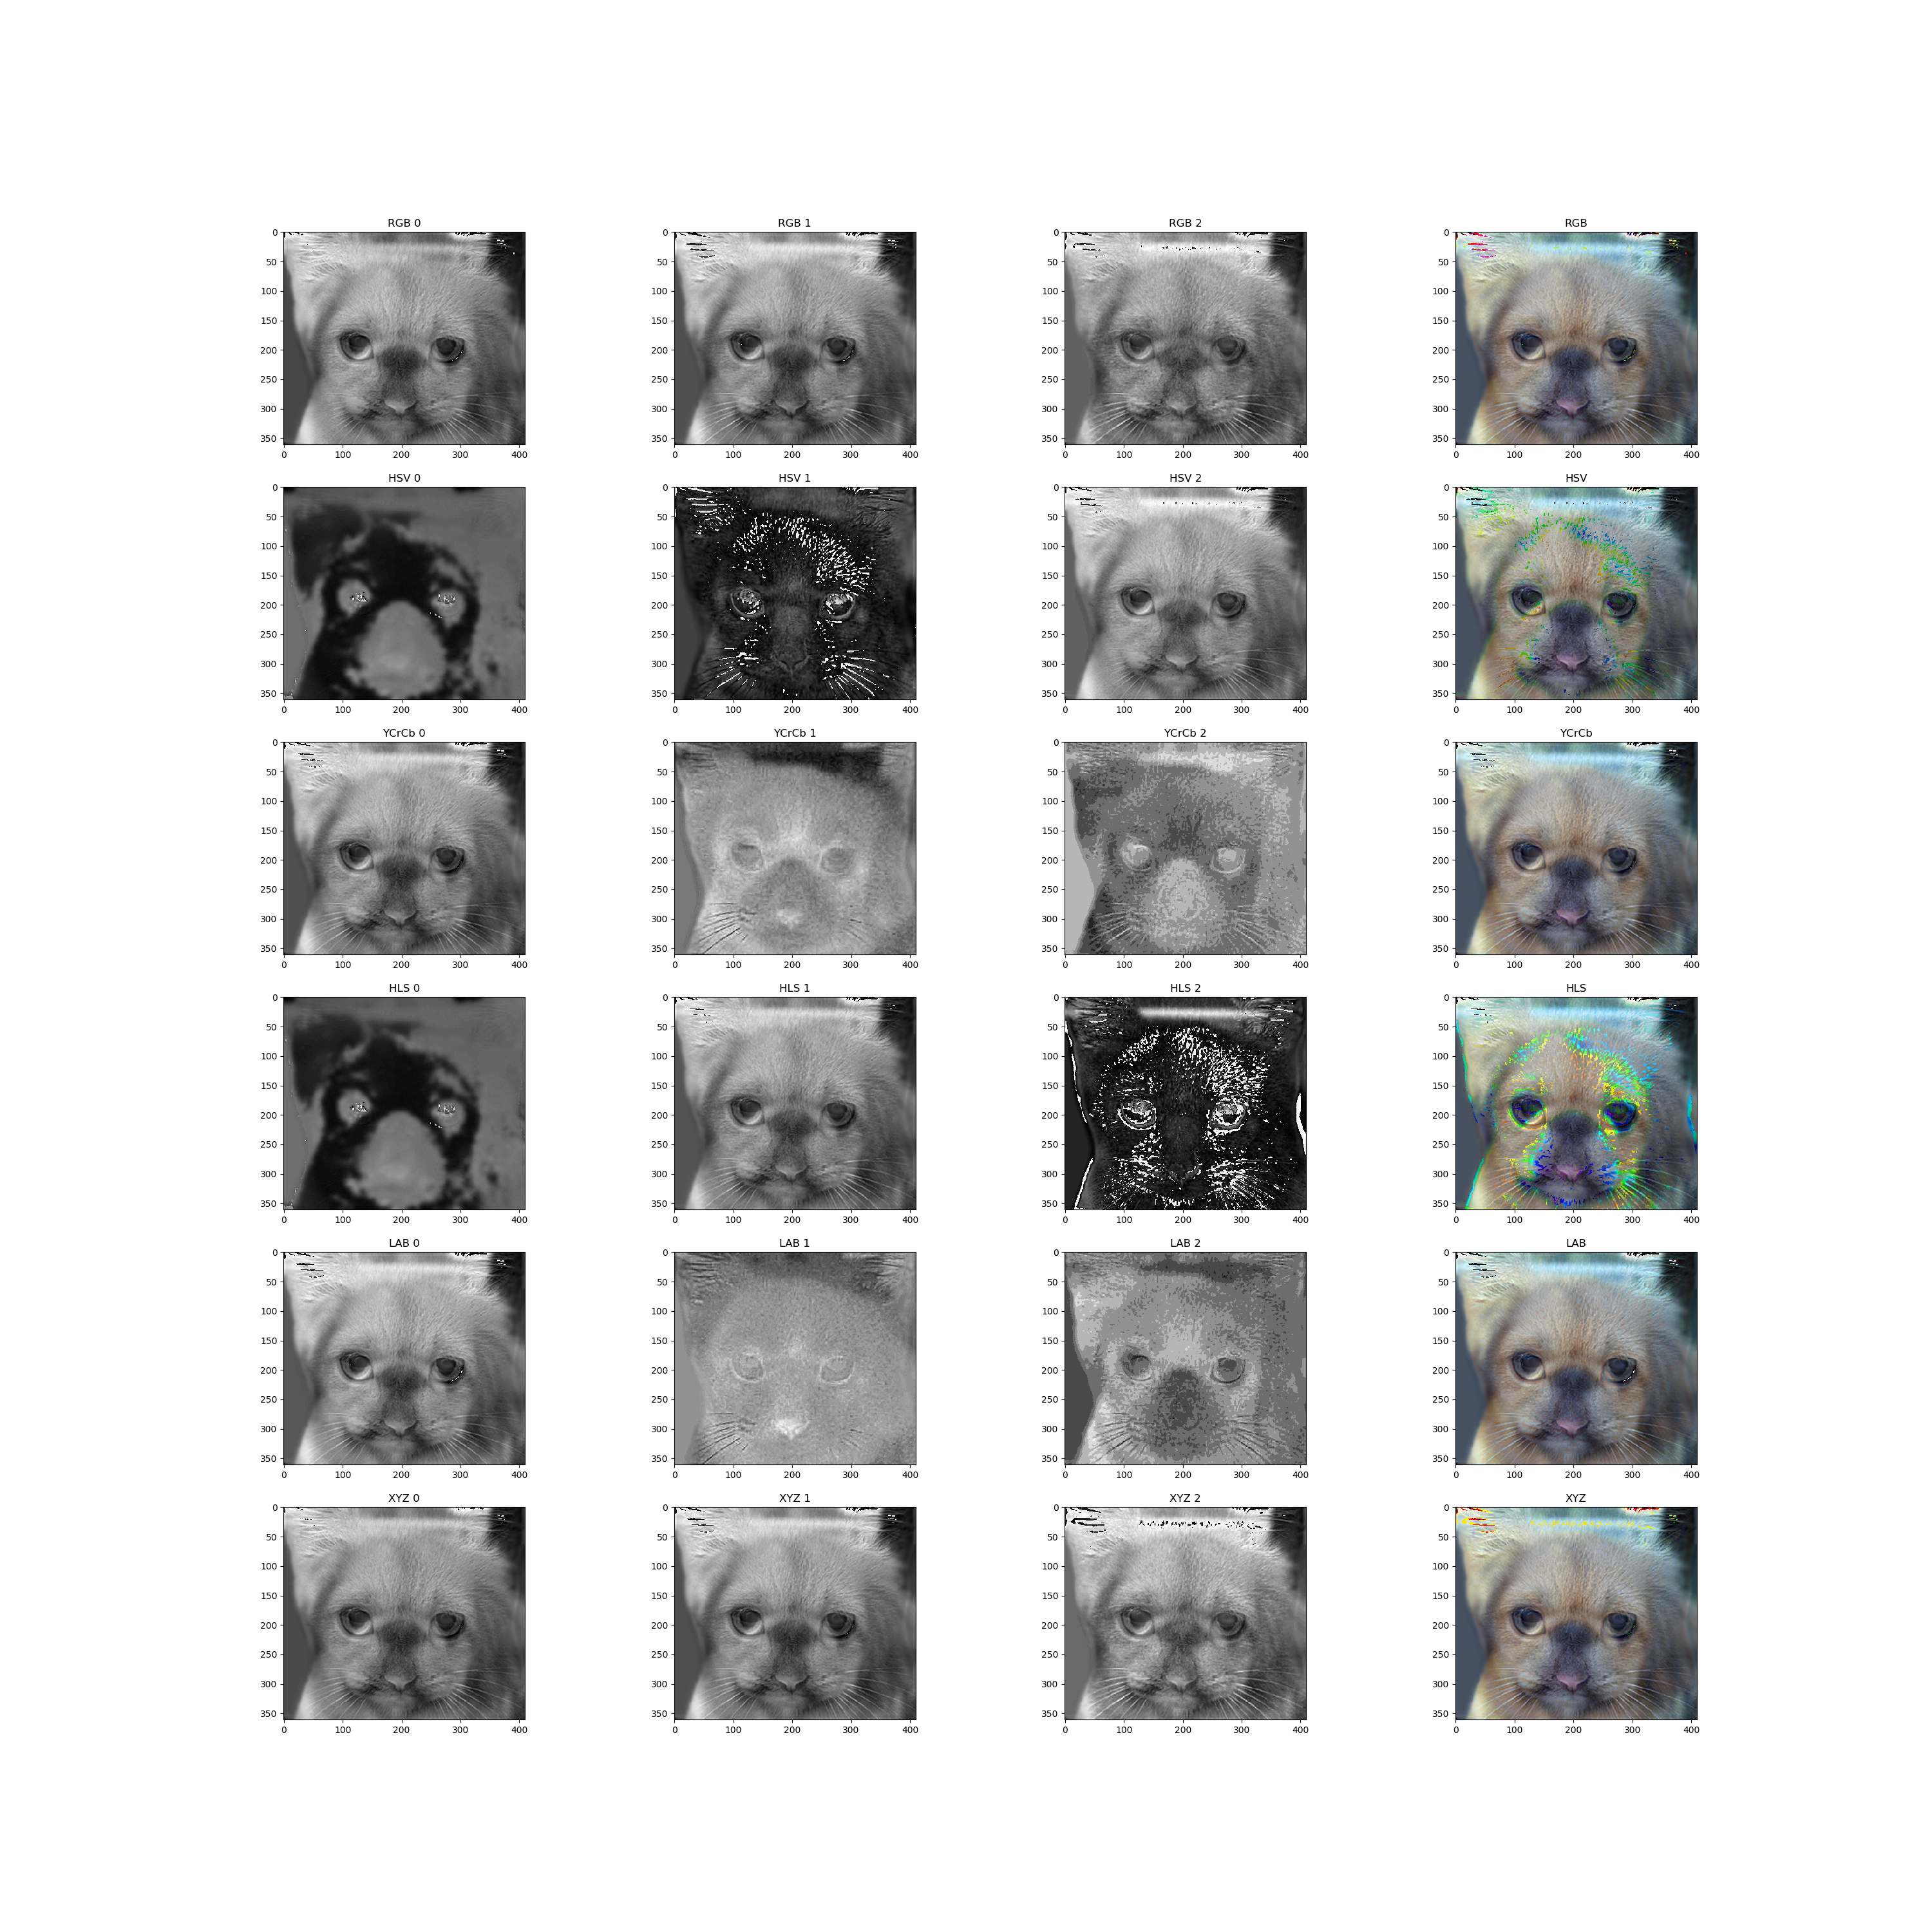

In [100]:
num_img = len(im1_list)
fig=plt.figure(figsize=(30, 30))
columns = 4
rows = num_img
count = 1
for i in range(num_img):
    img = np.zeros(shape=im1_BGR.shape, dtype=np.uint8)
    for j in range(3):
        fig.add_subplot(rows, columns, count)
        c_high = high_pass(im1_list[i], j, i)
        c_low = low_pass(im2_list[i], j, i)
        plt.imshow(cv2.cvtColor(c_high + c_low, cv2.COLOR_RGB2GRAY), cmap='gray')
        count += 1
        plt.title(cspace_name[i] + " " + str(j))
    
        img += c_high + c_low
    
    img = cv2.cvtColor(img, cvt_RGB[i]) if cvt_RGB[i] != None else img
    fig.add_subplot(rows, columns, count)
    plt.imshow(img)
    plt.title(cspace_name[i])
    count += 1    